# Diabetes Detection Model
Here, we implement a Diabetes detection model using Conv1D CNN layer and scikit class
The model is related to achieve an accuracy of 85+% and adam optimizer.
Below is the model.

### Importing models
### Tensorflow
https://www.tensorflow.org/api_docs
### Keras
https://keras.io/guides/
### Sequnetial
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
### models
https://www.tensorflow.org/api_docs/python/tf/keras/Model
### Conv1D
https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html
### Flatten
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
### Dense
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
### Dropout
https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
### BatchNormalization
https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
### sklearn.model_selection
https://scikit-learn.org/stable/api/sklearn.model_selection.html
### sklearn.preprocessing
https://scikit-learn.org/stable/modules/preprocessing.html
### train_test_split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
### StandardScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
### Accuracy_score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
### Confusion Matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
### sklearn.metrics
https://scikit-learn.org/stable/api/sklearn.metrics.html
### sklearn.svm
https://scikit-learn.org/stable/modules/svm.html
### SVC
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

### Loading Dataset

### pd.read_csv
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
### np.nan
https://www.askpython.com/python/examples/nan-in-numpy-and-pandas
### data.fillna
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
### data.median()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html
###

In [120]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names = columns)
## Handling missing values by replacing zeros with median
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[zero_columns] = data[zero_columns].replace(0, np.nan)
data.fillna(data.median(), inplace = True)

### Splitting features and labels
### data.drop
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
### data.drop
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [135]:
X = data.drop(columns = ['Outcome']).values
Y = data['Outcome'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

### Feature Scaling
### scaler.fit_transform()
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
### reshape()
https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [136]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Z_train = X_train
Z_test = X_test

## Reshaping for 1D CNN layers
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Building CNN model
Building a Conv1D layer model with 2 layers, Normalization, dropout and Dense modules.

### binary_crossentropy
https://www.geeksforgeeks.org/binary-cross-entropy-log-loss-for-binary-classification/
### adam optimizer
https://www.geeksforgeeks.org/adam-optimizer/
### metrics = [accuracy]
https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

In [137]:
model = Sequential ([
    Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = (X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.25),

    Conv1D(filters = 64, kernel_size = 2, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    Conv1D(filters = 64, kernel_size = 2, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    Conv1D(filters = 128, kernel_size = 2, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv1D(filters = 128, kernel_size = 2, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    Conv1D(filters = 256, kernel_size = 2, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),
    
    Dense(256, activation = 'relu'),
    Dropout(0.25),
    Flatten(),
    Dense(1, activation = 'sigmoid') # Binary classification
])
model.compile (optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

C:\Users\ihpc\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train Model 
Now, the model will be trained using model.fit()

### model.fit()
https://www.tensorflow.org/api_docs/python/tf/keras/Model
### verbose = 1
https://saturncloud.io/blog/understanding-the-use-of-verbose-in-keras-model-validation/
### model.predict()
https://www.tensorflow.org/decision_forests/tutorials/predict_colab

In [138]:
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 32, validation_data = (X_test, Y_test), verbose = 2)

Epoch 1/100
22/22 - 13s - 608ms/step - accuracy: 0.6339 - loss: 0.7085 - val_accuracy: 0.6883 - val_loss: 0.6789
Epoch 2/100
22/22 - 1s - 28ms/step - accuracy: 0.6773 - loss: 0.6221 - val_accuracy: 0.6234 - val_loss: 0.6869
Epoch 3/100
22/22 - 1s - 29ms/step - accuracy: 0.7120 - loss: 0.5901 - val_accuracy: 0.6364 - val_loss: 0.6721
Epoch 4/100
22/22 - 1s - 25ms/step - accuracy: 0.7221 - loss: 0.5775 - val_accuracy: 0.6364 - val_loss: 0.6582
Epoch 5/100
22/22 - 1s - 25ms/step - accuracy: 0.6946 - loss: 0.6082 - val_accuracy: 0.5325 - val_loss: 0.6944
Epoch 6/100
22/22 - 1s - 30ms/step - accuracy: 0.7221 - loss: 0.5621 - val_accuracy: 0.4675 - val_loss: 0.6980
Epoch 7/100
22/22 - 1s - 27ms/step - accuracy: 0.7453 - loss: 0.5320 - val_accuracy: 0.6623 - val_loss: 0.6104
Epoch 8/100
22/22 - 1s - 30ms/step - accuracy: 0.7337 - loss: 0.5121 - val_accuracy: 0.4805 - val_loss: 0.6970
Epoch 9/100
22/22 - 1s - 32ms/step - accuracy: 0.7438 - loss: 0.5266 - val_accuracy: 0.7403 - val_loss: 0.5679

In [139]:
## Predictions
Y_pred_cnn = (model.predict(X_test) >= 0.5).astype(int)
## Accuracy and Confusion Matrix
accuracy_cnn = accuracy_score(Y_test, Y_pred_cnn)
conf_matrix_cnn = confusion_matrix(Y_test, Y_pred_cnn)
print(f"CNN model Accuracy: {accuracy_cnn * 100:.2f}%")
print("\nConfusion Matrix (CNN):\n", conf_matrix_cnn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step
CNN model Accuracy: 71.43%

Confusion Matrix (CNN):
 [[37 13]
 [ 9 18]]


### Plotting the accuracy and loss

### plt.imshow()
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
### plt.colorbar()
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

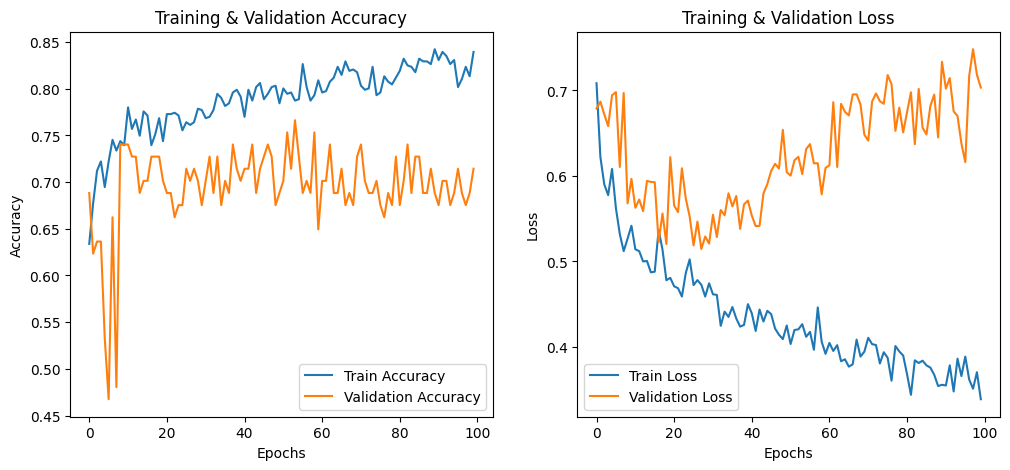

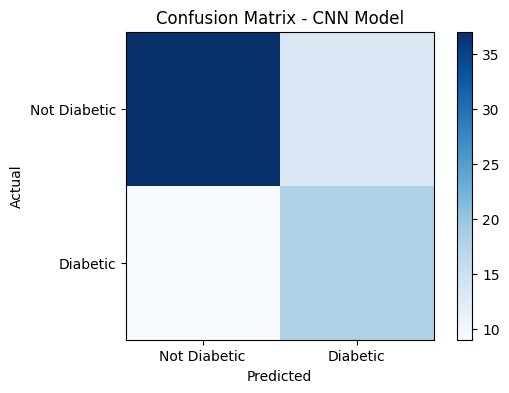

In [140]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

plt.show()


## Plotting Confusion Matrix
plt.figure(figsize = (6, 4))
plt.imshow(conf_matrix_cnn, cmap="Blues", interpolation="nearest")

plt.colorbar()
plt.xticks([0, 1], ["Not Diabetic", "Diabetic"])
plt.yticks([0, 1], ["Not Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN Model")
plt.show()

In [141]:
svm_model = SVC(kernel = 'rbf', C=1, gamma = 'scale')
svm_model.fit(Z_train, Y_train)
Y_pred_svm = svm_model.predict(Z_test)

In [142]:
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm * 100:.2f}%")
print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)

SVM Model Accuracy: 74.03%

Confusion Matrix (SVM):
 [[41  9]
 [11 16]]


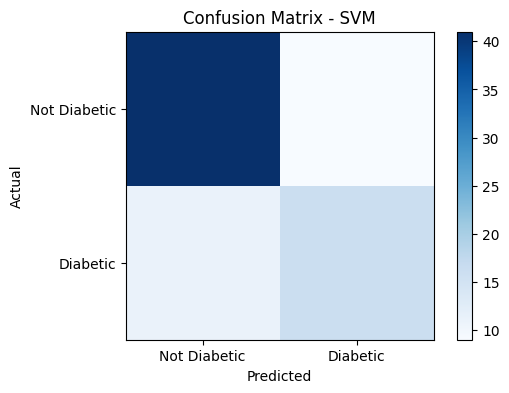

In [143]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_svm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1], ["Not Diabetic", "Diabetic"])
plt.yticks([0, 1], ["Not Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Thank You
The overall model performed 70+%, and the model would be improved to more than 90% with neural networks or SVM layer.